# HW4

# Part 1.1

In [165]:
import numpy as np
import pandas as pd

hasJob = [1,1,1,0,0,0,1,1]
hasFamily = [1,1,0,1,0,1,0,0]
isAbove30Years = [1,1,1,0,1,0,1,1]
defaulter = [0,0,0,0,1,1,1,1]

df = pd.DataFrame(data={'HasJob':hasJob, 'HasFamily': hasFamily, 'IsAbove30Years': isAbove30Years, 'Defaulter': defaulter})

In [166]:
columns = df.columns.tolist()
columns = columns[::-1]
df = df[columns]


In [167]:
df

,IsAbove30Years,HasJob,HasFamily,Defaulter
0,1,1,1,0
1,1,1,1,0
2,1,1,0,0
3,0,0,1,0
4,1,0,0,1
5,0,0,1,1
6,1,1,0,1
7,1,1,0,1


In [168]:
w_default = df['Defaulter'].sum()/df.shape[0]
w_hasFam = df['HasFamily'].sum()/df.shape[0]
w_hasJob = df['HasJob'].sum()/df.shape[0]
w_above30 = df['IsAbove30Years'].sum()/df.shape[0]

In [169]:
print(w_default, w_hasFam, w_hasJob, w_above30)

0.5 0.5 0.625 0.75


In [170]:
p_above30 = df[df["IsAbove30Years"]==1][df["Defaulter"]==1].shape[0]/df[df["IsAbove30Years"]==1].shape[0]
p_hasJob = df[df["HasJob"]==1][df["Defaulter"]==1].shape[0]/df[df["HasJob"]==1].shape[0]
p_hasFam = df[df["HasFamily"]==1][df["Defaulter"]==1].shape[0]/df[df["HasFamily"]==1].shape[0]

p_notAbove30 = df[df["IsAbove30Years"]==0][df["Defaulter"]==1].shape[0]/df[df["IsAbove30Years"]==0].shape[0]
p_notHasJob = df[df["HasJob"]==0][df["Defaulter"]==1].shape[0]/df[df["HasJob"]==0].shape[0]
p_notHasFam = df[df["HasFamily"]==0][df["Defaulter"]==1].shape[0]/df[df["HasFamily"]==0].shape[0]

print  (p_above30, p_hasJob, p_hasFam)
print (p_notAbove30, p_notHasJob, p_notHasFam)

0.5 0.4 0.25
0.5 0.6666666666666666 0.75


C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py

In [171]:
# Entropy Calculations
p_above30_ent = (p_above30*np.log2(1/p_above30) + (1-p_above30)*np.log2(1/(1-p_above30)))* w_above30 \
                        + (p_notAbove30*np.log2(1/p_notAbove30) + (1-p_notAbove30)*np.log2(1/(1-p_notAbove30)))*(1-w_above30)
p_hasJob_ent = (p_hasJob*np.log2(1/p_hasJob) + (1-p_hasJob)*np.log2(1/(1-p_hasJob)))* w_hasJob \
                        + (p_notHasJob*np.log2(1/p_notHasJob) + (1-p_notHasJob)*np.log2(1/(1-p_notHasJob)))*(1-w_hasJob)
p_hasFam_ent = (p_hasFam*np.log2(1/p_hasFam) + (1-p_hasFam)*np.log2(1/(1-p_hasFam)))* w_hasFam \
                        + (p_notHasFam*np.log2(1/p_notHasFam) + (1-p_notHasFam)*np.log2(1/(1-p_notHasFam)))*(1-w_hasFam)

In [172]:
print("Entropy Values:")
print("Above 30: ", p_above30_ent," HasJob: ", p_hasJob_ent, " HasFam: ",  p_hasFam_ent)

print("Information Gained:")
print("Above 30: ", 1-p_above30_ent," HasJob: ", 1-p_hasJob_ent, " HasFam: ",  1-p_hasFam_ent)

Entropy Values:
Above 30:  1.0  HasJob:  0.951205059305  HasFam:  0.811278124459
Information Gained:
Above 30:  0.0  HasJob:  0.0487949406954  HasFam:  0.188721875541


# Conclusion

Most information is gained from the HasFamily variable, hence that should be used for the first split. 

# Part 1.2

In [173]:
A = 0.7
B = 0.2
C = 0.1

In [174]:
A_ent = np.log2(1/A)
B_ent = np.log2(1/B)
C_ent = np.log2(1/C)

In [175]:
S_ent = A*np.log2(1/A) + B*np.log2(1/B) + C*np.log2(1/C)

In [176]:
S_ent

1.1567796494470395

# Conclusion
S has an entropy of 1.1568, meaning it should not be compressed into any number of bits less than that as it will be at risk of losing information. 

# Part 2: Natural Language Processing

# Part 2.1

A bag of words model collects each of the words independently and effectively just creates a "bag of words" - an unordered list of words. This might be useful to see how often certain keywords or terms appear. 

For a word2vec model, the position of each word relative to its surrounding words is coded in some fashion. This allows for higher quality information. By knowing that two words are next to each other, the meaning can change - i.e. “good” vs. “not good” and also “running” and “running away”. This is very important for semantic analysis. Furthermore, this becomes more useful as we consider a longer string of words even building up to a sentence or paragraph. Also word2vec has representation of each of the words through a classification. These classifications would be previously trained on a corpus allowing for new data/words to be categorized making it easier to understand or map the content of a body of text

As mentioned, word2vec is superior to bag of words when higher quality information from a document is needed. Extended past a keyword search or frequency count. Analyses such as semantic analysis is where it is useful. 

Alternatively, a bag of words model is superior if only lighter information is needed, and the dataset could be quite large. For instance if many articles had to be compared or even just one single very large book. In the instance of determining the genre of a novel for a library, using bag of words may be more efficient. 


# Part 2.2

A word vector is a simple representation of the position of a word in the context of a document. Word embedding is where each word is encoded with an array of what is likely weights for a categorization score of that word into different semantic categories. For instance the word “chair” might be embedded with scores for “furniture”, “house, “pet”, etc. Whatever categories would be present in the corpus the model was trained on. Then when analyzing that text and reading “chair”, higher scores for “furniture” should be embedded.


# Part 2.3

A corpus in NLP is effectively the training text for a model. For instance, Python's NLTK has its own corpus which is quite large. The vocabulary is just the list of words found in the corpus that have been trained for. That is unlike the corpus which is the body of text which can be in a variety of different formats. 

In [56]:
import pandas as pd      
import numpy as np
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer


In [57]:
train = pd.read_csv("prideNprejudice.csv", header=0, \
                    delimiter="\t", quoting=0)

In [58]:
print(train.shape)
print()
print(train)
df = train.copy()

(5370, 1)

                                              sentences
0     It is a truth universally acknowledged, that a...
1     "My dear Mr. Bennet," said his lady to him one...
2                       Bennet replied that he had not.
3     "But it is," returned she; "for Mrs. Long has ...
4                                Bennet made no answer.
5           "Do you not want to know who has taken it?"
6                           cried his wife impatiently.
7     "_You_ want to tell me, and I have no objectio...
8                          "This was invitation enough.
9     "Why, my dear, you must know, Mrs. Long says t...
10                        ""What is his name?""Bingley.
11                      ""Is he married or single?""Oh!
12                         Single, my dear, to be sure!
13    A single man of large fortune; four orfive tho...
14                     What a fine thing for our girls!
15                                            ""How so?
16                              How c

In [82]:
sentences = []
for row in df.iterrows():
#     print(row[1]["sentences"])
#     row[1]["sentences"] = re.sub('.','. ',row[1]["sentences"])
    row[1]["sentences"] = re.sub('[^a-zA-Z]',' ',row[1]["sentences"])
    row[1]["sentences"] = row[1]["sentences"].lower()
    sentences.append(row[1]["sentences"].split())

# print(sentences)
# words = sentences.split()
# print(words)




In [83]:
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

In [85]:
model.similarity("elizabeth", "girl")

C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.99510798439533155

In [102]:
vocab =  list(model.wv.vocab)
print(vocab)
# model[vocab]

['it', 'is', 'a', 'truth', 'acknowledged', 'that', 'single', 'man', 'in', 'good', 'fortune', 'must', 'be', 'want', 'of', 'wife', 'however', 'little', 'known', 'the', 'feelings', 'or', 'views', 'such', 'may', 'on', 'entering', 'neighbourhood', 'this', 'so', 'well', 'fixed', 'families', 'he', 'considered', 'some', 'one', 'other', 'their', 'daughters', 'my', 'dear', 'mr', 'bennet', 'said', 'his', 'lady', 'to', 'him', 'day', 'have', 'you', 'heard', 'park', 'let', 'at', 'last', 'replied', 'had', 'not', 'but', 'returned', 'she', 'for', 'mrs', 'long', 'has', 'just', 'been', 'here', 'and', 'me', 'all', 'about', 'made', 'no', 'answer', 'do', 'know', 'who', 'taken', 'cried', 'tell', 'i', 'objection', 'hearing', 'was', 'invitation', 'enough', 'why', 'says', 'netherfield', 'young', 'large', 'from', 'north', 'england', 'monday', 'chaise', 'four', 'see', 'place', 'with', 'agreed', 'immediately', 'take', 'possession', 'before', 'servants', 'are', 'tobe', 'house', 'by', 'end', 'next', 'week', 'what', 

C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


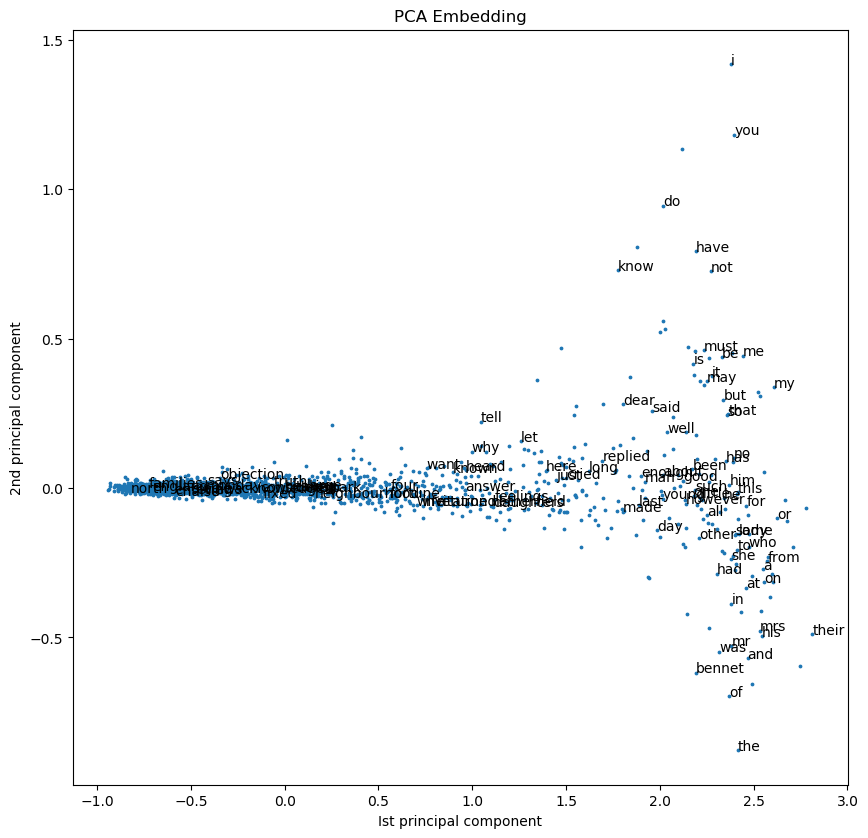

In [94]:
import matplotlib.pyplot as plt
from sklearn import decomposition
# get two principle components of the feature space
pca= decomposition.PCA(n_components=2).fit_transform(model[vocab])

# set figure settings
plt.figure(figsize=(10,10),dpi=100)

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab)],axis=1)
df.columns = ['x', 'y', 'word']



plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')


plt.scatter(x=pca[:, 0], y=pca[:, 1],s=3)
for i, word in enumerate(df['word'][0:100]):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
plt.title("PCA Embedding")
plt.show()     

# Evaluations

In [119]:
print(model.similarity("elizabeth", "girl"))
print(model.most_similar("girl")[0])
print(model.doesnt_match(['story', 'great', 'spirit', 'disposition', 'delighted', 'altogether']))
print(model.most_similar("woman")[0])
print(model.similarity("great", "spirit"))

0.995107984395
('still', 0.9997456073760986)
story
('against', 0.9998397827148438)
0.998230711935


C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashis\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\

# Part 4

In [120]:
import sqlite3

In [121]:
connection = sqlite3.connect('parents.db')

In [123]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 34B9-EDC6

 Directory of C:\Users\Ashis\Documents\Code\ashisghosh_data_x_s18\hw\hw4

04/24/2018  04:44 AM    <DIR>          .
04/24/2018  04:44 AM    <DIR>          ..
04/24/2018  04:24 AM    <DIR>          .ipynb_checkpoints
04/24/2018  04:44 AM           159,292 HW4_DataX.ipynb
04/24/2018  04:44 AM                 0 parents.db
04/24/2018  03:01 AM           683,859 prideNprejudice.csv
               3 File(s)        843,151 bytes
               3 Dir(s)  39,671,316,480 bytes free


In [130]:
cursor = connection.cursor()

In [133]:
cursor.execute("DROP TABLE IF EXISTS parents;")

In [134]:
sql_command = """
CREATE TABLE parents (
parent VARCHAR(20),
child VARCHAR(20));
"""

In [135]:
cursor.execute(sql_command)

In [136]:
sql_command = """
INSERT INTO parents (parent, child)
 VALUES ("abraham", "barack") UNION
 VALUES ("abraham", "clinton") UNION
 VALUES ("delano", "herbert") UNION
 VALUES ("fillmore", "abraham") UNION
 VALUES ("fillmore", "delano") UNION
 VALUES ("fillmore", "grover") UNION
 VALUES ("eisenhower", "fillmore");
 """

In [137]:
cursor.execute(sql_command)

In [138]:
connection.commit() 

connection.close()

In [139]:
connection = sqlite3.connect('parents.db')

cursor = connection.cursor()

In [149]:
a = pd.read_sql_query('SELECT * FROM parents',con = connection)
a

,parent,child
0,abraham,barack
1,abraham,clinton
2,delano,herbert
3,eisenhower,fillmore
4,fillmore,abraham
5,fillmore,delano
6,fillmore,grover


In [150]:
b = pd.read_sql_query('SELECT * FROM parents WHERE parent="abraham"',con = connection)
b

,parent,child
0,abraham,barack
1,abraham,clinton


In [158]:
c = pd.read_sql_query('SELECT * FROM parents WHERE child LIKE "%e%"',con = connection)
c

,parent,child
0,delano,herbert
1,eisenhower,fillmore
2,fillmore,delano
3,fillmore,grover


In [163]:
d = pd.read_sql_query('SELECT DISTINCT parent FROM parents ORDER BY parent DESC',con = connection)
d

,parent
0,fillmore
1,eisenhower
2,delano
3,abraham


In [193]:
e = pd.read_sql_query('SELECT * FROM parents',con = connection)
# e = pd.read_sql_query('')
sql_command = """
SELECT parent, COUNT(*) 
FROM parents
GROUP BY parent
HAVING COUNT(*) > 1
"""
e = pd.read_sql_query(sql_command, con = connection)

# f = cursor.execute(sql_command).fetchall()
e

sql_command = """
SELECT child 
FROM parents
WHERE parent="abraham"
OR
parent = "fillmore"
"""

f = pd.read_sql_query(sql_command, con = connection)

f


,child
0,barack
1,clinton
2,abraham
3,delano
4,grover
